# Women in Marvel Comic Books

Predicting the Prominence of Female Heroes in the future

## Load Libraries 

In [33]:
#Import Python Libraries
#import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as mpl 
import seaborn as sns

## Import Data Sets 

In [34]:
#Read csv file
marvel = pd.read_csv('../data/marvel-wikia-data.csv')
#Read csv file
dc = pd.read_csv("../data/dc-wikia-data.csv")

## Group the Data by Sex

In [35]:
#Group data using sex
marvelSex = marvel.groupby('SEX')
marvelSex.describe()

APPEARANCES                                        \
                             count        mean         std   min     25%   
SEX                                                                        
Agender Characters            42.0   19.666667   53.601814   1.0    2.00   
Female Characters           3599.0   20.284801   81.514689   1.0    2.00   
Genderfluid Characters         2.0  282.500000  352.846284  33.0  157.75   
Male Characters            10899.0   16.753922  103.773190   1.0    1.00   

                                                  Year                 ...     \
                          50%     75%     max    count         mean    ...      
SEX                                                                    ...      
Agender Characters        9.5   14.00   348.0     36.0  1992.888889    ...      
Female Characters         4.0   11.00  1713.0   3628.0  1990.440187    ...      
Genderfluid Characters  282.5  407.25   532.0      2.0  1977.000000    ...      
Male Characters           3.0    7.00  4043.0  11100.0  1983.181982    ...      

                                         page_id                 \
                            75%     max    count           mean   
SEX                                                               
Agender Characters      2006.25  2013.0     45.0  480017.844444   
Female Characters       2004.00  2013.0   3837.0  277689.715403   
Genderfluid Characters  1991.00  2005.0      2.0   12947.500000   
Male Characters         1999.00  2013.0  11638.0  303743.710259   

                                                                               \
                                  std     min        25%       50%        75%   
SEX                                                                             
Agender Characters      256440.454937  1292.0  329878.00  521160.0  705824.00   
Female Characters       252305.139978  1036.0   24456.00  248370.0  500665.00   
Genderfluid Characters   15422.706004  2042.0    7494.75   12947.5   18400.25   
Male Characters         252078.262422  1025.0   29159.25  289309.0  508917.50   

                                  
                             max  
SEX                               
Agender Characters      755268.0  
Female Characters       755092.0  
Genderfluid Characters   23853.0  
Male Characters         755278.0  

[4 rows x 24 columns]

## Looking at the Data 

In [36]:
# Counts the total number characters by sex
marvelHeroCount = marvel['SEX'].value_counts()

print(marvelHeroCount)

Male Characters           11638
Female Characters          3837
Agender Characters           45
Genderfluid Characters        2
Name: SEX, dtype: int64


In [37]:
# The average appearances of heroes grouped by their sex
avgAppBySex = marvel.groupby('SEX')[['APPEARANCES']].mean()
avgAppBySex

,APPEARANCES
SEX,
Agender Characters,19.666667
Female Characters,20.284801
Genderfluid Characters,282.500000
Male Characters,16.753922


In [38]:
# The standard diviation of hero appearances based by their sex
stdAppBySex = marvel.groupby('SEX')[['APPEARANCES']].std()
stdAppBySex

,APPEARANCES
SEX,
Agender Characters,53.601814
Female Characters,81.514689
Genderfluid Characters,352.846284
Male Characters,103.773190


## Setting up New Data frames

In [39]:
# DataFrame with name, ID, Alignment, eye color, hair color, sex, alive status, appearances, and year
marvelNew = pd.DataFrame(marvel, columns = ['name' , 'ID', 'ALIGN' , 'EYE', 'HAIR', 'SEX', 'ALIVE', 
                                            'APPEARANCES', 'Year'])
marvelNew.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,1950.0


### New Marvel Data Frame for Female Characters sorted by Year

In [40]:
# Get a dataframe with only female heroes indexes  
marvelFemaleHeroes = marvelNew[marvelNew['SEX'] ==  'Female Characters']
marvelFemaleHeroes.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,Year
11,Susan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1713.0,1961.0
13,Ororo Munroe (Earth-616),Public Identity,Good Characters,Blue Eyes,White Hair,Female Characters,Living Characters,1512.0,1975.0
17,Mary Jane Watson (Earth-616),No Dual Identity,Good Characters,Green Eyes,Red Hair,Female Characters,Living Characters,1304.0,1965.0
24,Wanda Maximoff (Earth-616),Public Identity,Good Characters,Green Eyes,Brown Hair,Female Characters,Living Characters,1161.0,1964.0
26,Janet van Dyne (Earth-616),Public Identity,Good Characters,Blue Eyes,Auburn Hair,Female Characters,Living Characters,1120.0,1963.0


In [41]:
# Drop rows that do not have a Year present
marvelFemaleHeroes.dropna(subset = ['EYE'], inplace=True) 
# Now the data frame femaleHeroes only have female characters with a year value present

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
# Sort the rows of marvelfemaleHeroes by column 'Year'
marvelFemaleHeroes = marvelFemaleHeroes.sort_values(by ='Year' )
print("Contents of Sorted Dataframe based on a single column 'Year' : ")
marvelFemaleHeroes.head()

Contents of Sorted Dataframe based on a single column 'Year' : 


,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,Year
366,Dorma (Earth-616),No Dual Identity,Neutral Characters,Blue Eyes,Auburn Hair,Female Characters,Deceased Characters,113.0,1939.0
10546,Diane Carson (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1.0,1940.0
1455,Claire Voyant (Earth-616),Secret Identity,Neutral Characters,Black Eyes,Blond Hair,Female Characters,Living Characters,25.0,1940.0
325,Betty Dean (Earth-616),No Dual Identity,Good Characters,Blue Eyes,White Hair,Female Characters,Deceased Characters,127.0,1940.0
437,Azura (Earth-616),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,95.0,1940.0


### New Marvel Data Frame for Male Characters sorted by Year 

In [43]:
# data frame with male and female
marvelMaleHeroes = marvelNew[marvelNew['SEX'] ==  'Male Characters']
marvelMaleHeroes.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,1950.0


In [44]:
# Drop rows that do not have a Year present
marvelMaleHeroes.dropna(subset = ['EYE'], inplace=True) 
# Now the data frame maleHeroes only have female characters with a year value present

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
marvelMaleHeroes = marvelMaleHeroes.sort_values(by ='Year' )
print("Contents of Sorted Dataframe based on a single column 'Year' : ")
marvelMaleHeroes.head()

Contents of Sorted Dataframe based on a single column 'Year' : 


,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,Year
60,Human Torch (Android) (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,548.0,1939.0
6977,Ken Masters (Earth-616),No Dual Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,3.0,1939.0
1193,David Rand (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,31.0,1939.0
306,Thomas Halloway (Earth-616),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,135.0,1939.0
901,Phineas Horton (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,Deceased Characters,41.0,1939.0


## Comparing the Data Between Male and Female Marvel Characters

In [46]:
# Stating the number of male and female characters in dc
numberOfFemaleCharacters = len(marvelFemaleHeroes)
numberOfMaleCharacters = len(marvelMaleHeroes)
totalMarvel = numberOfFemaleCharacters + numberOfMaleCharacters

print('Total Number of Characters:', str(totalMarvel))
print('Number of Male Characters: ', str(numberOfMaleCharacters))
print('Number of Female Characters: ', str(numberOfFemaleCharacters))

Total Number of Characters: 6420
Number of Male Characters:  4492
Number of Female Characters:  1928


In [47]:
# get the average appearences of male heroes per year 
avgMaleApp = marvelMaleHeroes['APPEARANCES'].mean()
print('The average appearence of a Male Character: ', str(avgMaleApp))

# get the average appearences of female heroes per year 
avgFemaleApp = marvelFemaleHeroes['APPEARANCES'].mean()
print('The average appearence of a Female Character: ', str(avgFemaleApp))

The average appearence of a Male Character:  36.357698655977366
The average appearence of a Female Character:  34.08026030368764


In [48]:
# get the standard deviation appearences of male heroes 
avgMaleApp = marvelMaleHeroes['APPEARANCES'].std()
print('The standard deviation appearence of a Male Character: ', str(avgMaleApp))

# get the standard deviation appearences of female heroes 
avgFemaleApp = marvelFemaleHeroes['APPEARANCES'].std()
print('The standard deviation appearence of a Female Character: ', str(avgFemaleApp))

The standard deviation appearence of a Male Character:  164.14175475353522
The standard deviation appearence of a Female Character:  111.43088517630555


In [49]:
# count apperances per year
maleHeroYearlyCount = marvelMaleHeroes['Year'].value_counts()
maleCountYearly = maleHeroYearlyCount.sort_index()

# count apperances per year
femaleHeroYearlyCount = marvelFemaleHeroes['Year'].value_counts()
femaleCountYearly = femaleHeroYearlyCount.sort_index()

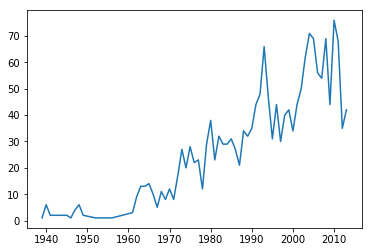

In [50]:
# Female: graphing tha amount of male vs female characters introducted per year
femaleCountYearly.plot(x ='Year', y='femaleCountYearly', kind = 'line')

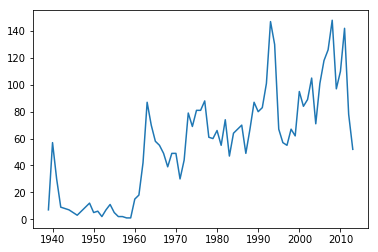

In [51]:
# Female: graphing tha amount of male vs female characters introducted per year
maleCountYearly.plot(x ='Year', y='maleCountYearly', kind = 'line')

Text(0, 0.5, 'Number of Characters Introduced')

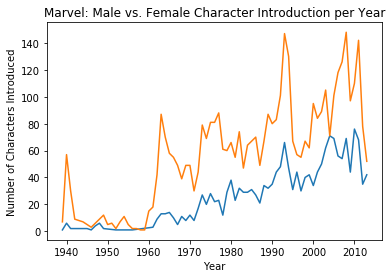

In [52]:
# Overlaying the Male vs Female introductions per year
ax = femaleCountYearly.plot(x ='Year', y='femaleCountYearly', kind = 'line', 
                            title='Marvel: Male vs. Female Character Introduction per Year')
maleCountYearly.plot(ax=ax)

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Number of Characters Introduced")

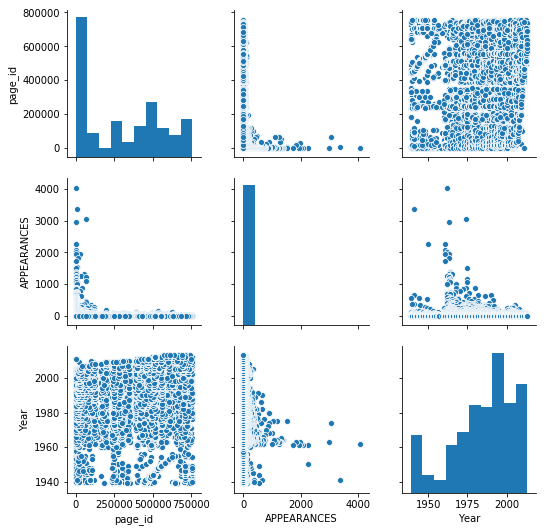

In [53]:
sns.pairplot(marvel)

## Ploting the Data for Marvel and Dc

In [54]:
comicCharacters = pd.concat([marvel, dc], ignore_index = True, sort = False)
comicCharacters.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,YEAR
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,NaN
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,NaN
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,NaN
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,NaN
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,NaN


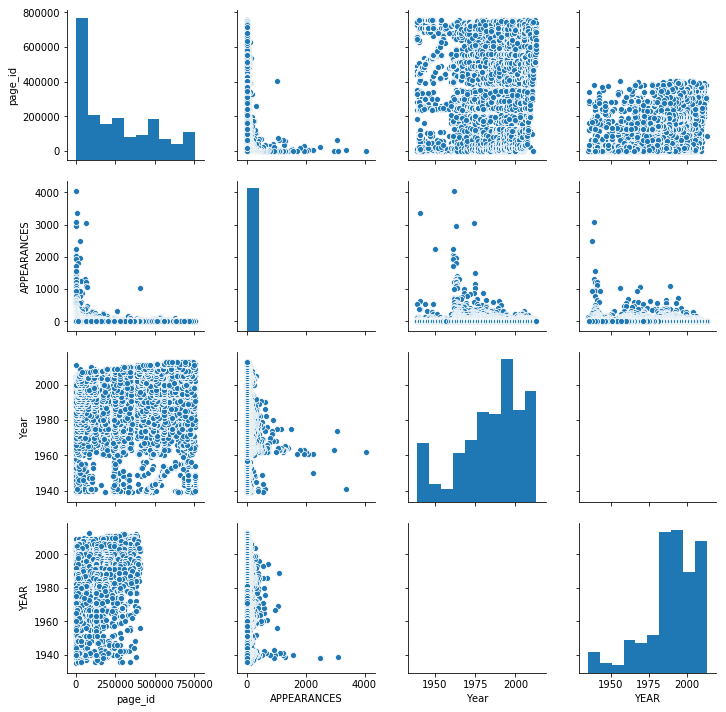

In [55]:
sns.pairplot(comicCharacters)